<h1>Relational Classification</h1>
<h2>using random node sampling and partial crawls</h2>

In [1]:
__author__ = "Lisette Espin-Noboa"
__reference__ = """
[1] Inference in OSNs via Lightweight Partial Crawls. Konstantin Avrachenkov, Bruno Ribeiro and Jithin K. Sreedharan
    https://github.com/jithin-k-sreedharan/HypRW
    https://hal.inria.fr/hal-01403018/document
    
[2] Stochastic Gradient Descent for Relational Logistic Regression via Partial Network Crawls
    https://arxiv.org/pdf/1707.07716.pdf

[3] Should We Be Confident in Peer Effects Estimated From Social Network Crawls?    
    https://www.aaai.org/ocs/index.php/ICWSM/ICWSM17/paper/viewFile/15696/14882
    
[4] Classification in networked data: A toolkit and a univariate case study. 
    Macskassy, S. A., & Provost, F. (2007). 
    Journal of machine learning research, 8(May), 935-983.    
    http://www.jmlr.org/papers/volume8/macskassy07a/macskassy07a.pdf
                """
__license__ = "GPL"
__version__ = "1.0.3"
__maintainer__ = "Lisette Espin-Noboa"
__email__ = "Lisette.Espin@gesis.org"
__status__ = "Developing"

<h2>Dependencies</h2>


In [2]:
###############################################################################################
# Warnings
###############################################################################################
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
warnings.filterwarnings("ignore", message="SparseEfficiencyWarning")
warnings.filterwarnings("ignore", message="Changing the sparsity structure of a csr_matrix is expensive.")

In [3]:
#################################################
# In case Binder does not have dependencies
#################################################
# import sys
# !{sys.executable} -m pip install pandas seaborn numpy

In [4]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import seaborn as sns
from utils import plot_results
from utils import plot_compact
from utils import plot_vs

<h2>Constants</h2>


In [5]:
SAMPLINGS =  ['random_nodes','partial_crawls','partial_crawls_min']
FN = "summary_{}.csv"

<h2>Plots</h2>

In [6]:
sns.set_context('notebook')

<h3>1. Random Nodes</h3>

In [7]:
df_random_nodes = pd.read_csv(FN.format('random_nodes'), index_col=0).query("m in [4,20,40] & N > 1000 & N < 3000")
df_random_nodes = df_random_nodes.query("runid==1 & N>1000 & N<3000").copy()
df_random_nodes.head()

,runid,N,E,m,B,H,rocauc,entropy,ccm,ccM,...,h01,h10,B0,B1,H00,H11,H01,H10,h,precise_pseeds
200,1,2000,7984,4,0.1,0.5,0.574720,0.140193,0.254335,0.776275,...,0.13,0.08,0.9,0.1,0.79,0.01,0.09,0.11,0.5,0.10
210,1,2000,7984,4,0.1,0.5,0.534376,0.244550,0.119048,0.902235,...,0.09,0.09,0.9,0.1,0.79,0.01,0.09,0.11,0.5,0.60
220,1,2000,7984,4,0.1,0.5,0.512691,0.281804,0.075188,0.923149,...,0.09,0.08,0.9,0.1,0.79,0.01,0.09,0.11,0.5,0.40
230,1,2000,7984,4,0.1,0.5,0.482971,0.205568,0.123377,0.879668,...,0.20,0.09,0.9,0.1,0.79,0.01,0.09,0.11,0.5,0.20
240,1,2000,7984,4,0.1,0.5,0.511967,0.178895,0.150538,0.825554,...,0.14,0.21,0.9,0.1,0.79,0.01,0.09,0.11,0.5,0.05


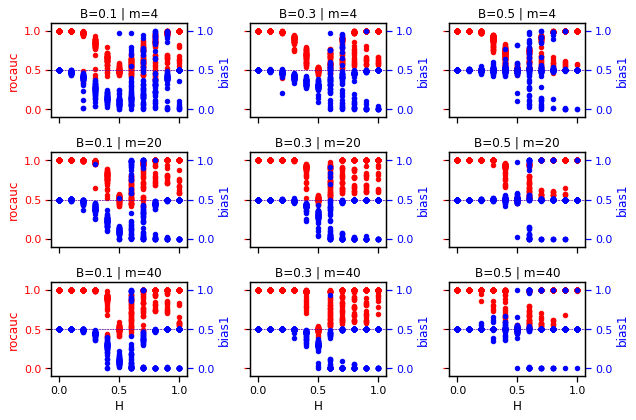

In [8]:
plot_vs(df_random_nodes, 'rocauc', 'bias1')

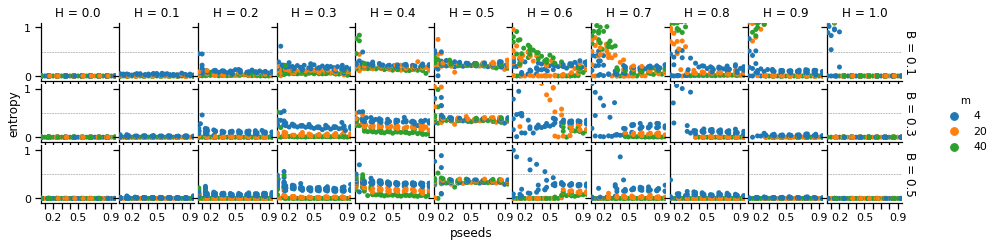

In [9]:
plot_results(df_random_nodes,'entropy')

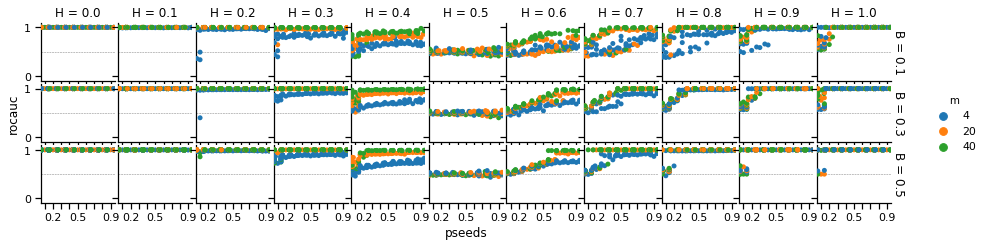

In [10]:
plot_results(df_random_nodes,'rocauc')

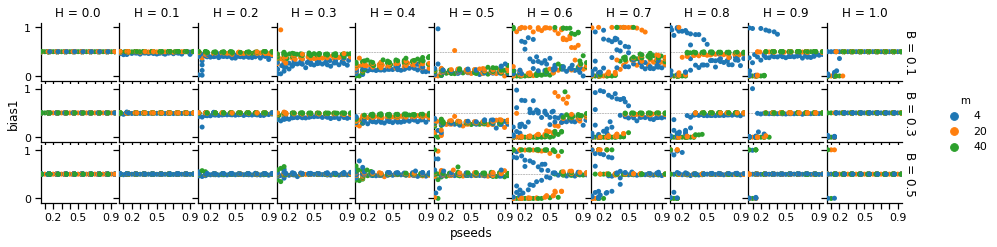

In [11]:
plot_results(df_random_nodes,'bias1')

<h3>2. Partial Crawls</h3>

In [12]:
df_partial_crawls = pd.read_csv(FN.format('partial_crawls'), index_col=0)
df_partial_crawls.head()

,runid,N,E,m,B,H,rocauc,entropy,ccm,ccM,...,h01,h10,B0,B1,H00,H11,H01,H10,h,precise_pseeds
0,1,2000,7984,4,0.1,0.8,0.798352,0.233865,0.130769,0.912442,...,0.07,0.01,0.9,0.1,0.88,0.02,0.08,0.02,0.90,0.39
1,1,2000,78400,40,0.3,0.2,1.000000,0.000652,0.996997,1.000000,...,0.50,0.26,0.7,0.3,0.04,0.21,0.49,0.26,0.25,0.38
2,1,2000,39600,20,0.3,0.8,1.000000,0.006197,0.982051,0.998853,...,0.13,0.05,0.7,0.3,0.64,0.17,0.13,0.06,0.81,0.37
3,1,2000,39465,20,0.3,1.0,1.000000,-0.000003,1.000000,1.000000,...,0.00,0.00,0.7,0.3,0.70,0.30,0.00,0.00,1.00,0.41
4,1,2000,39409,20,0.1,1.0,1.000000,-0.000001,1.000000,1.000000,...,0.00,0.00,0.9,0.1,0.10,0.90,0.00,0.00,1.00,0.37


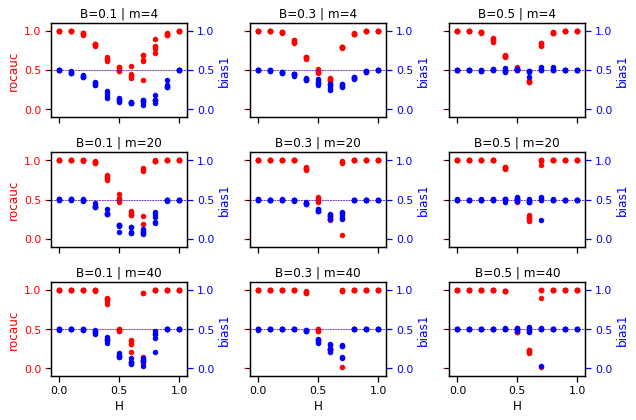

In [13]:
plot_vs(df_partial_crawls, 'rocauc', 'bias1')

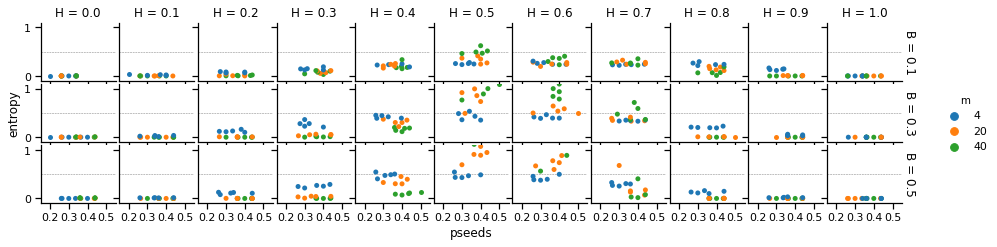

In [14]:
plot_results(df_partial_crawls,'entropy')

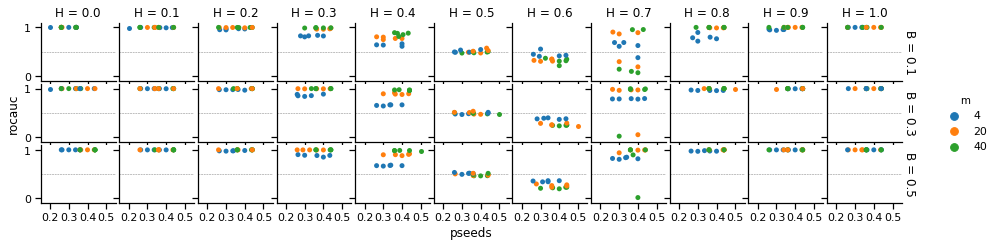

In [15]:
plot_results(df_partial_crawls,'rocauc')

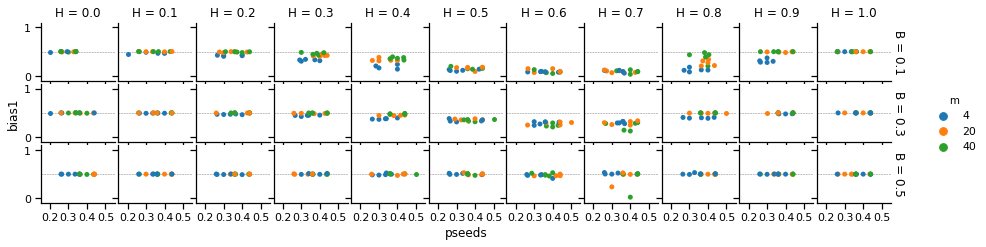

In [16]:
plot_results(df_partial_crawls,'bias1')

<h3>3. Partial Crawls (starting from minorities)</h3>

In [17]:
df_partial_crawls_min = pd.read_csv(FN.format('partial_crawls_min'), index_col=0)
df_partial_crawls_min.head()

,runid,N,E,m,B,H,rocauc,entropy,ccm,ccM,...,h01,h10,B0,B1,H00,H11,H01,H10,h,precise_pseeds
0,1,2000,39454,20,0.1,1.0,1.000000,-7.434529e-07,1.0,1.000000,...,0.00,0.00,0.9,0.1,0.10,0.90,0.00,0.00,1.00,0.39
1,1,2000,78400,40,0.1,0.1,0.998944,-4.759357e-07,1.0,0.986893,...,0.18,0.65,0.9,0.1,0.27,0.01,0.09,0.63,0.28,0.32
2,1,2000,39481,20,0.5,1.0,0.501076,-3.103146e-06,1.0,0.000000,...,0.00,0.00,0.5,0.5,0.50,0.50,0.00,0.00,1.00,0.33
3,1,2000,78400,40,0.1,0.1,0.999889,-5.555467e-07,1.0,0.988917,...,0.10,0.73,0.9,0.1,0.24,0.01,0.09,0.66,0.25,0.38
4,1,2000,78400,40,0.3,0.2,1.000000,1.262880e-04,1.0,1.000000,...,0.27,0.50,0.7,0.3,0.21,0.04,0.26,0.49,0.25,0.40


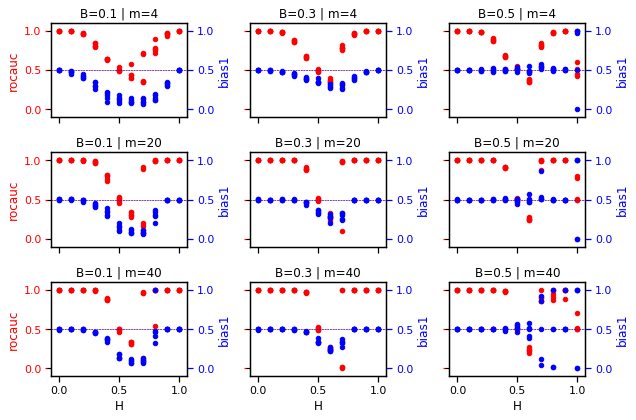

In [18]:
plot_vs(df_partial_crawls_min, 'rocauc', 'bias1')

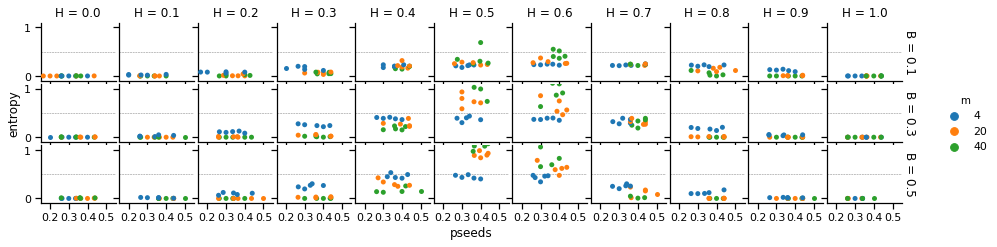

In [19]:
plot_results(df_partial_crawls_min,'entropy')

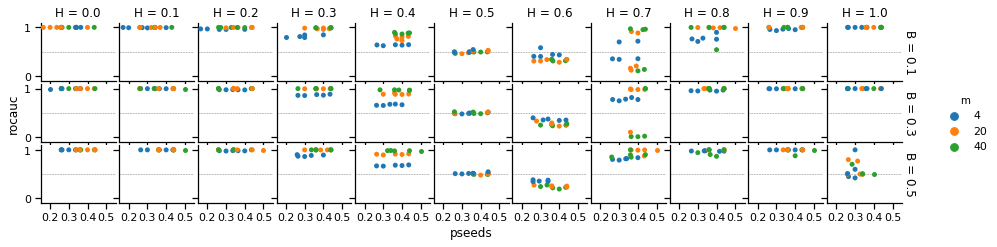

In [20]:
plot_results(df_partial_crawls_min,'rocauc')

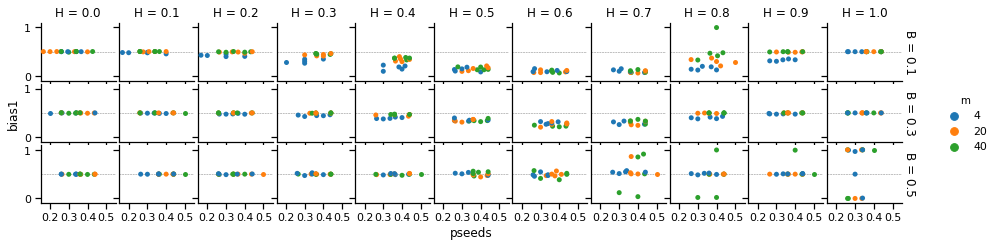

In [21]:
plot_results(df_partial_crawls_min,'bias1')

<h1>Comparison</h1>

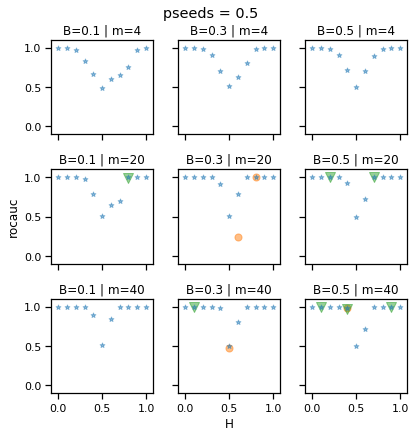

In [53]:
import matplotlib.pyplot as plt 
import numpy as np
import matplotlib
from collections import OrderedDict

data = {'random_nodes': df_random_nodes, 'partial_crawls':df_partial_crawls, 'partial_crawls_min':df_partial_crawls_min}
colors = {'random_nodes': 'tab:blue', 'partial_crawls':'tab:orange', 'partial_crawls_min':'tab:green'}
cmap = matplotlib.cm.get_cmap('tab10')
marker = {'random_nodes': '*', 'partial_crawls':'o', 'partial_crawls_min':'v'}
markersize = {'random_nodes': 25, 'partial_crawls':50, 'partial_crawls_min':100}

metric = 'rocauc'
pseeds = 0.5

fig,axes = plt.subplots(3,3, sharex=True, sharey=True, figsize=(6,6))
for dataset,df in data.items():
    for r,m in enumerate([4,20,40]):
        for c,b in enumerate([0.1,0.3,0.5]):

            
            tmp = df.query("B==@b & m==@m").copy()
            
            tmp.loc[:,'pseeds1'] = tmp.apply(lambda row: round(float(row['pseeds']),1), axis=1)
            tmp = tmp.query("pseeds1==@pseeds").groupby(['H'])[['H',metric]].mean()
            
            axes[r,c].set_title("B={} | m={}".format(b,m))

            try:
                if len(data)==0:
                    _ = plt.plot.scatter([], label=dataset, color=colors[dataset], marker=marker[dataset], markersize=markersize[dataset], alpha=0.5)
                else:
                    _ = tmp.plot.scatter(x='H', y=metric, ax=axes[r,c], label=dataset, color=colors[dataset], marker=marker[dataset], s=markersize[dataset], alpha=0.5)
            except:
                pass
            
            axes[r,c].set_xlabel('')
            axes[r,c].set_ylabel('')
            
            try:
                axes[r,c].get_legend().set_visible(False)
            except:
                pass

axes[0,0].set_ylim((-0.1,1.1))
axes[1,0].set_ylabel(metric)
axes[-1,1].set_xlabel('H')

handles, labels = axes[0,0].get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
#axes[1,-1].legend(by_label.values(), by_label.keys(), loc='center left', bbox_to_anchor=(1, 0.5))

plt.suptitle("pseeds = {}".format(pseeds), y=1.01)

plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.tight_layout()    
plt.show()
plt.close()